In [2]:
# fORWARD pass using ALS
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms






In [3]:
# Install necessary librarie

import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import torch
import scipy as sp
from scipy.signal import stft
from scipy.signal import stft
import numpy as np
from scipy.signal import stft
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset  # Import Dataset class
from torchvision.utils import save_image
import scipy.interpolate

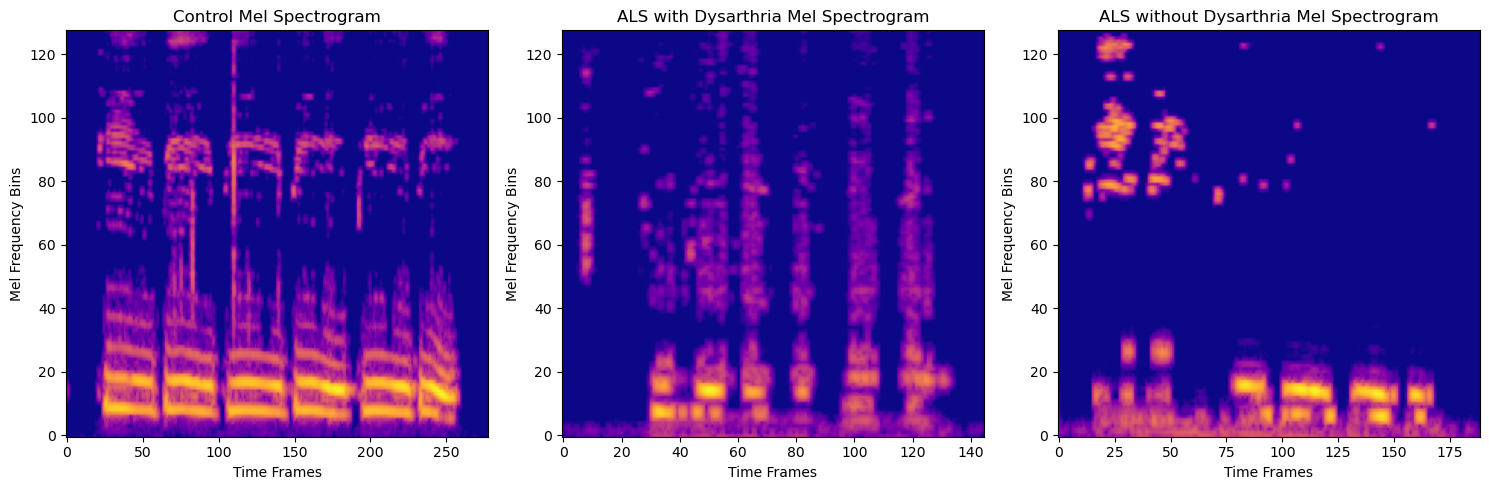

In [4]:

import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Step 1: Define the data paths
data_path = "C:\\Users\\user\\OneDrive - GIST\\Desktop\\PhD_Research\\data\\All"
control_path = 'Control'
als_with_dysarthria_path = 'ALSwDysarthria'
als_without_dysarthria_path = 'ALSwoDysarthria'

# Step 2: Create directories and load files
control_dir = os.path.join(data_path, control_path)
control_files = [os.path.join(control_dir, file) for file in os.listdir(control_dir)]

als_with_dir = os.path.join(data_path, als_with_dysarthria_path)
als_with_dys_files = [os.path.join(als_with_dir, file) for file in os.listdir(als_with_dir)]

als_without_dir = os.path.join(data_path, als_without_dysarthria_path)
als_without_dys_files = [os.path.join(als_without_dir, file) for file in os.listdir(als_without_dir)]

# Step 3: Function to compute Mel spectrogram
def compute_mel_spectrogram(audio, sr):
    # Compute the Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
    return mel_spectrogram

# Step 4: Load audio files and compute Mel spectrograms
control_mel_spectrograms = []
als_with_dys_mel_spectrograms = []
als_without_dys_mel_spectrograms = []

# Load Control Mel spectrograms
for file in control_files:
    audio, sr = librosa.load(file, sr=None)
    mel_spectrogram = compute_mel_spectrogram(audio, sr)
    control_mel_spectrograms.append(mel_spectrogram)

# Load ALS with Dysarthria Mel spectrograms
for file in als_with_dys_files:
    audio, sr = librosa.load(file, sr=None)
    mel_spectrogram = compute_mel_spectrogram(audio, sr)
    als_with_dys_mel_spectrograms.append(mel_spectrogram)

# Load ALS without Dysarthria Mel spectrograms
for file in als_without_dys_files:
    audio, sr = librosa.load(file, sr=None)
    mel_spectrogram = compute_mel_spectrogram(audio, sr)
    als_without_dys_mel_spectrograms.append(mel_spectrogram)

# Step 5: Plot one Mel spectrogram from each category
plt.figure(figsize=(15, 5))

# Control Mel Spectrogram
plt.subplot(1, 3, 1)
plt.imshow(librosa.power_to_db(control_mel_spectrograms[0]), aspect='auto', origin='lower', cmap='plasma')
plt.title('Control Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')

# ALS with Dysarthria Mel Spectrogram
plt.subplot(1, 3, 2)
plt.imshow(librosa.power_to_db(als_with_dys_mel_spectrograms[0]), aspect='auto', origin='lower', cmap='plasma')
plt.title('ALS with Dysarthria Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')

# ALS without Dysarthria Mel Spectrogram
plt.subplot(1, 3, 3)
plt.imshow(librosa.power_to_db(als_without_dys_mel_spectrograms[0]), aspect='auto', origin='lower', cmap='plasma')
plt.title('ALS without Dysarthria Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')

plt.tight_layout()
plt.show()

In [5]:

from scipy.interpolate import interp1d

# Define target shape based on the highest shapes
target_length = 2256  # Set to the maximum length found (for ALS with Dysarthria)

def interpolate_mfcc(mfcc, target_length):
    # Interpolate to the target length
    x_old = np.linspace(0, 1, mfcc.shape[1])
    x_new = np.linspace(0, 1, target_length)
    interpolated_mfcc = np.zeros((mfcc.shape[0], target_length))
    
    for i in range(mfcc.shape[0]):
        f = interp1d(x_old, mfcc[i], kind='linear', fill_value="extrapolate")
        interpolated_mfcc[i] = f(x_new)
    
    return interpolated_mfcc

# Apply interpolation to each MFCC list
control_mel_fixed = [interpolate_mfcc(mfcc, target_length) for mfcc in control_mel_spectrograms]
als_with_dys_mel_fixed = [interpolate_mfcc(mfcc, target_length) for mfcc in als_with_dys_mel_spectrograms]
als_without_dys_mel_fixed = [interpolate_mfcc(mfcc, target_length) for mfcc in als_without_dys_mel_spectrograms]

Text(0, 0.5, 'Mel Frequency Bins')

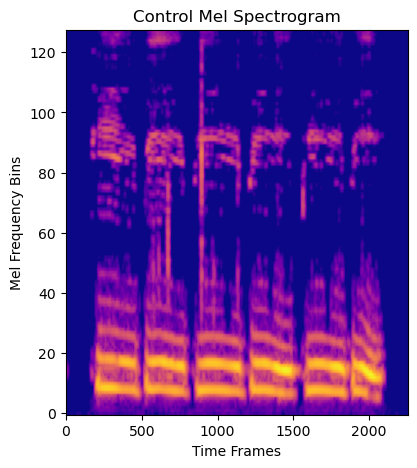

In [6]:
# Step 5: Plot one Mel spectrogram from each category
plt.figure(figsize=(15, 5))

# Control Mel Spectrogram
plt.subplot(1, 3, 1)
plt.imshow(librosa.power_to_db(control_mel_fixed[0]), aspect='auto', origin='lower', cmap='plasma')
plt.title('Control Mel Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')


In [7]:



# Convert lists of spectrograms into tensors
control_mel_tensors = [torch.tensor(mel).unsqueeze(0) for mel in control_mel_fixed]  # [1, 128, 2256]
als_with_dys_mel_tensors = [torch.tensor(mel).unsqueeze(0) for mel in als_with_dys_mel_fixed]
als_without_dys_mel_tensors = [torch.tensor(mel).unsqueeze(0) for mel in als_without_dys_mel_fixed]


 # Prepare your mel spectrogram batch (e.g., ALS without dysarthria data)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mel_spectrograms_batch = torch.stack(als_without_dys_mel_tensors[:64]).to(device) # Define the DiffusionForward class (already provided)
# Your DiffusionForward class should be here



In [46]:
mel_spectrogram.shape

(128, 110)

In [15]:
import torch
import numpy as np

class DiffusionForward:
    def __init__(self, timesteps=1000, beta_start=0.0001, beta_end=0.02, s=0.008, schedule_type='linear', noise_type='gaussian'):
        self.timesteps = timesteps
        self.noise_type = noise_type  # Store the noise type
        self.schedule_type = schedule_type
        
        # Create the beta schedule based on the selected schedule type
        if schedule_type == 'linear':
            self.betas = self.linear(beta_start, beta_end, timesteps)
        elif schedule_type == 'cosine':
            self.betas = self.cosine(timesteps, s)
        elif schedule_type == 'quadratic':
            self.betas = self.quadratic(beta_start, beta_end, timesteps)
        elif schedule_type == 'sigmoid':
            self.betas = self.sigmoid(beta_start, beta_end, timesteps)
        else:
            raise ValueError(f"Unknown schedule type: {schedule_type}")
        
        # Precompute alpha values
        self.alphas = 1.0 - self.betas
        self.alpha_bars = torch.cumprod(self.alphas, dim=0)  
    
    def linear(self, beta_start, beta_end, timesteps):
        return torch.linspace(beta_start, beta_end, timesteps)

    def cosine(self, timesteps, s):
        steps = timesteps + 1
        x = torch.linspace(0, timesteps, steps)
        alphas_cumprod = torch.cos(((x / timesteps) + s) / (1 + s) * torch.pi * 0.5) ** 2
        alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
        betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
        return torch.clip(betas, 0.0001, 0.9999)
    
    def sigmoid(self, beta_start, beta_end, timesteps):
        betas = torch.linspace(-6, 6, timesteps)
        return torch.sigmoid(betas) * (beta_end - beta_start) + beta_start
   
    def quadratic(self, beta_start, beta_end, timesteps):
        return torch.linspace(beta_start ** 0.5, beta_end ** 0.5, timesteps) ** 2

    def add_noise(self, x):
        if self.noise_type == 'gaussian':
            return torch.randn_like(x)  # Gaussian noise
        elif self.noise_type == 'uniform':
            return torch.rand_like(x) * 2 - 1  # Uniform noise [-1, 1]
        elif self.noise_type == 'laplace':
            return torch.distributions.Laplace(0, 1).sample(x.shape).to(x.device)  # Laplacian noise
        else:
            raise ValueError(f"Unknown noise type: {self.noise_type}")

    def forward(self, x, t):
        if isinstance(t, int):
            t = torch.tensor([t], dtype=torch.long, device=x.device)
            
            batch_size = x.shape[0]
            alpha_bar_t = self.alpha_bars[t].view(-1, 1, 1, 1)  # Shape to match the input

            # Sample noise based on the noise type
            noise = self.add_noise(x)
            
            # Add noise according to the forward process
            noisy_image = torch.sqrt(alpha_bar_t) * x + torch.sqrt(1 - alpha_bar_t) * noise
            return noisy_image


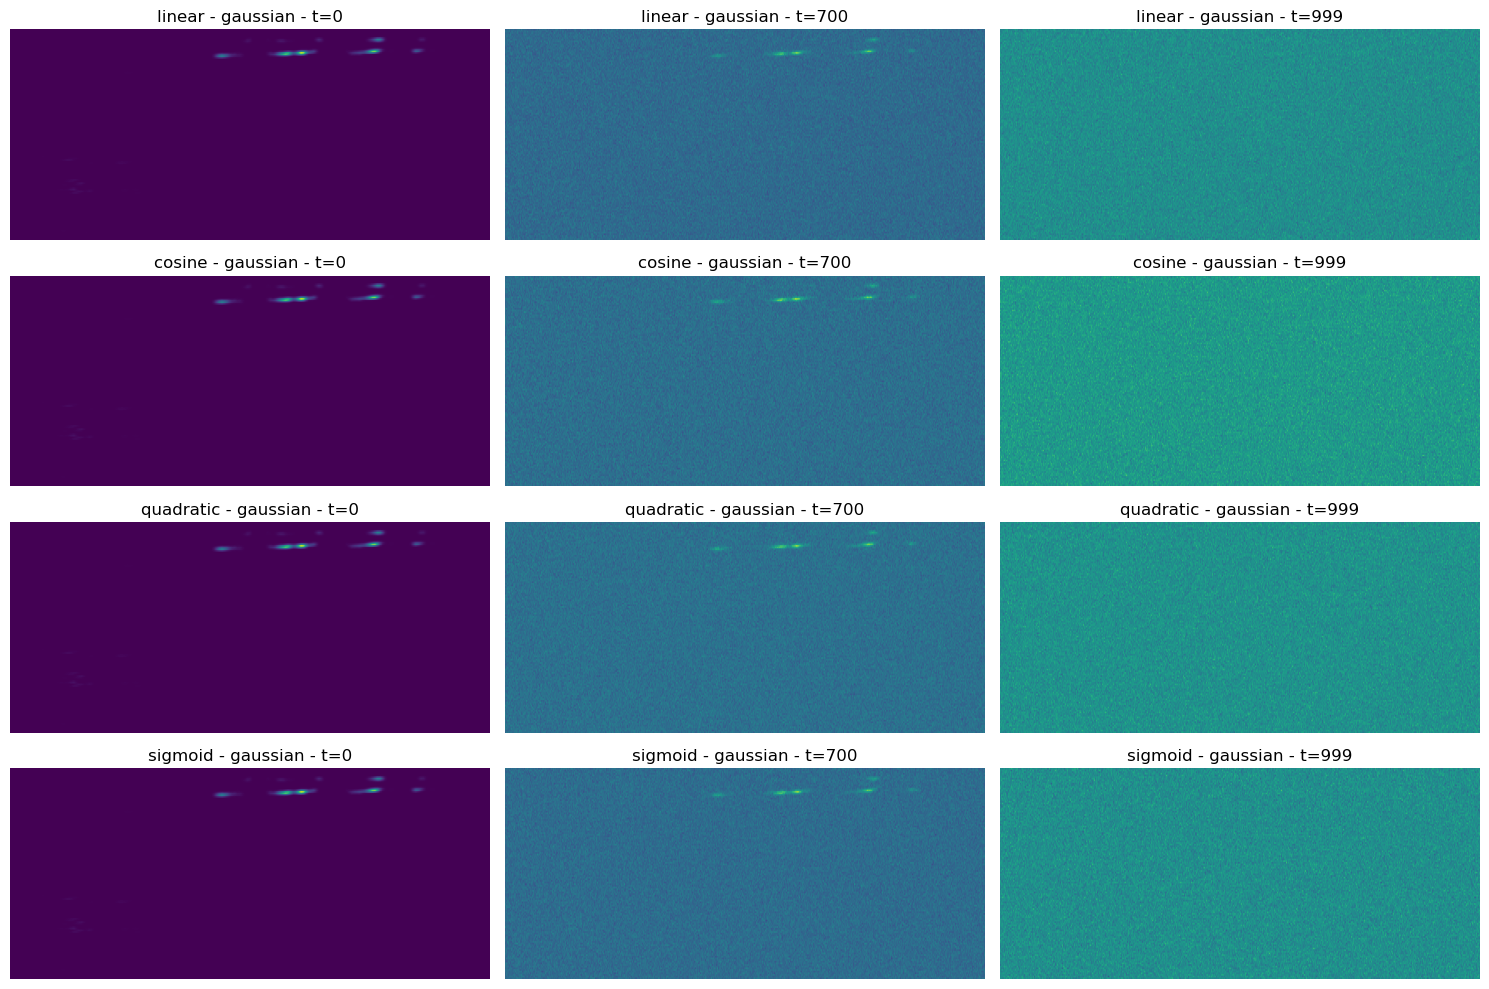

In [42]:
# Function to plot images with different noise types for each beta schedule at specified timesteps
def plot_noise_combinations(diffusion, original_image, timesteps=[0, 700, 999]):
    noise_types = ['gaussian']
    schedule_types = ['linear', 'cosine', 'quadratic', 'sigmoid']
    
    # Create subplots: each row represents a unique combination of schedule type and noise type
    fig, axs = plt.subplots(len(schedule_types) * len(noise_types), len(timesteps), figsize=(15, 10))
    
    for row, schedule in enumerate(schedule_types):
        for col, noise in enumerate(noise_types):
            # Update the beta schedule and noise type
            diffusion.schedule_type = schedule
            diffusion.noise_type = noise
            
            for t_idx, t in enumerate(timesteps):
                # Generate noisy images at different timesteps
                noisy_image = diffusion.forward(original_image, t)

                # Normalize the image for better visualization
                noisy_image = (noisy_image - noisy_image.min()) / (noisy_image.max() - noisy_image.min())

                # Plot the noisy image
                axs[row * len(noise_types) + col, t_idx].imshow(noisy_image.squeeze().cpu().numpy(), aspect='auto')
                axs[row * len(noise_types) + col, t_idx].set_title(f'{schedule} - {noise} - t={t}')
                axs[row * len(noise_types) + col, t_idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Instantiate the DiffusionForward class
diffusion = DiffusionForward(timesteps=1000)

# Get a batch of images from the DataLoader to use for the plots
images = next(iter(mel_spectrograms_batch))  # If only images are returned
original_image = images[0].unsqueeze(0)  # Take the first image and add a batch dimension

# Plot combinations of beta schedules and noise types
plot_noise_combinations(diffusion, original_image)


In [47]:
images.shape

torch.Size([1, 128, 2256])

In [45]:
import torch

# Function to calculate and display mean and standard deviation for each combination
def analyze_noise_combinations(diffusion, original_image, timesteps=[0, 100, 500, 700, 1999]):
    noise_types = ['gaussian', 'uniform', 'laplace']
    schedule_types = ['linear', 'cosine', 'quadratic', 'sigmoid']
    
    results = {}
    
    for schedule in schedule_types:
        for noise in noise_types:
            # Update the beta schedule and noise type
            diffusion.schedule_type = schedule
            diffusion.noise_type = noise
            
            # Generate the noisy image at the last timestep
            last_timestep = timesteps[-1]
            noisy_image = diffusion.forward(original_image, last_timestep)

            # Debug: Print the shape of the noisy_image
            print(f"Noise Type: {noise}, Schedule: {schedule}, Noisy Image Shape: {noisy_image.shape}")

            # Check and compute mean and std
            if len(noisy_image.shape) == 4 and noisy_image.shape[1] == 1:  # Shape (1, 1, height, width)
                mean = torch.mean(noisy_image).item()  # Mean across all dimensions
                std = torch.std(noisy_image).item()    # Std across all dimensions
            elif len(noisy_image.shape) == 3:  # Shape (1, height, width)
                mean = torch.mean(noisy_image).item()
                std = torch.std(noisy_image).item()
            elif len(noisy_image.shape) == 2:  # Shape (height, width)
                mean = torch.mean(noisy_image).item()
                std = torch.std(noisy_image).item()
            else:
                raise ValueError("The noisy_image should have shape (1, 1, height, width), (1, height, width), or (height, width).")

            # Store results
            results[(schedule, noise)] = (mean, std)
    
    return results

# Get the original image from your batch
original_image = images[0].unsqueeze(0)  # Take the first image and add a batch dimension

# Instantiate the DiffusionForward class
diffusion = DiffusionForward(timesteps=2000)

# Perform analysis of noise combinations
analysis_results = analyze_noise_combinations(diffusion, original_image)

# Print the results in a structured format
for (schedule, noise), (mean, std) in analysis_results.items():
    print(f'Schedule: {schedule}, Noise: {noise} -> Mean: {mean:.4f}, Std: {std:.4f}')


Noise Type: gaussian, Schedule: linear, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: uniform, Schedule: linear, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: laplace, Schedule: linear, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: gaussian, Schedule: cosine, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: uniform, Schedule: cosine, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: laplace, Schedule: cosine, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: gaussian, Schedule: quadratic, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: uniform, Schedule: quadratic, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: laplace, Schedule: quadratic, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: gaussian, Schedule: sigmoid, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: uniform, Schedule: sigmoid, Noisy Image Shape: torch.Size([1, 1, 128, 2256])
Noise Type: lapla